In [1]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


Using TensorFlow backend.


60000 (28, 28)
60000 5


In [2]:
from keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

In [3]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
units = 64
model.add(Dense(units=units, activation='sigmoid', input_shape=(image_size,)))
for i in range(9):
    model.add(Dense(units=units, activation='sigmoid'))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)               

In [11]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/step - loss: 2.3167 - accuracy: 0.1092 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 2/10
54000/54000 [==============================] - 2s 30us/step - loss: 2.3015 - accuracy: 0.1132 - val_loss: 2.3027 - val_accuracy: 0.1050
Epoch 3/10
54000/54000 [==============================] - 2s 30us/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3031 - val_accuracy: 0.1050
Epoch 4/10
54000/54000 [==============================] - 2s 30us/step - loss: 2.3015 - accuracy: 0.1130 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 5/10
54000/54000 [==============================] - 2s 30us/step - loss: 2.3015 - accuracy: 0.1131 - val_loss: 2.3026 - val_accuracy: 0.1050
Epoch 6/10
54000/54000 [==============================] - 2s 30us/step - loss: 2.3015 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 7/10
54000/54000 [==============================] - 2s 30us/ste

10000/10000 [==============================] - 0s 41us/step


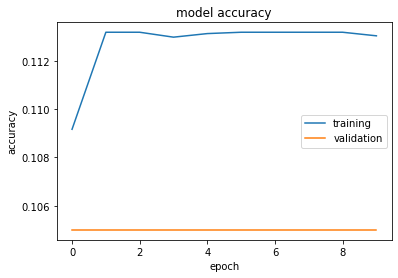

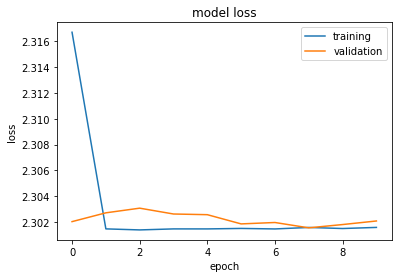

Test loss: 2.3
Test accuracy: 0.113


In [12]:
loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Use Keras to build 3 networks, each with at least 10 hidden layers such that:

* The first model has fewer than 10 nodes per layer.
* The second model has between 10-50 nodes per layer.
* The third model has between 50-100 nodes per layer.

Then, answer these questions:  

* Did any of these models achieve better than 20% accuracy on validation or test data?
  * State a hypothesis about why these networks performed the way they did.
     * The long chain of nodes resulted in the vanishing gradients problem since the sigmoid activation function was used
  * *An answer to this question is given in a notebook from the next section [01-activations](/02-training-and-regularization-tactics/01-activations.ipynb)*
* How many total trainable parameters do each of these models have?
  * First model with 4 nodes per layer contained 3370 trainable nodes with 11.3 % test accuracy
  * Second model with 16 nodes per layer contained  15178 trainable nodes with 11.3 % test accuracy
  * Third model with 64 nodes per layer contained 88,330 trainable nodes with 11.3 % test accuracy
* Is there a clear correlation between number of trainable parameters and accuracy?
  * No, the test accuracy was the same for all number of nodes per layer run
  * Consider your results from part one in answering this question.
     * Increasing the depth of layers does not cause the vanishing/exploding graidient problem, increasing the width does though.